# Support Vector Machines

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [3]:
from sklearn.datasets.samples_generator import make_blobs #make_blobs =hacer burbujas

In [4]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

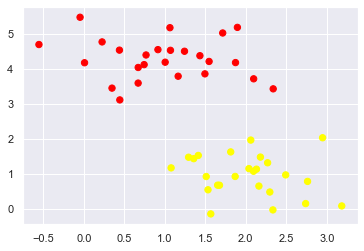

In [5]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 40, cmap="autumn")

(-1, 3.5)

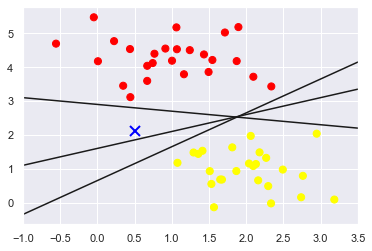

In [6]:
xx = np.linspace(-1, 3.5) #creamos un vector que vaya desde -1 a 3.5
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10) #creamos un punto x

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]: #creamos unas rectas(a,b) (a=pendiente, b=corte en x )
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

## Maximización del margen

(-1, 3.5)

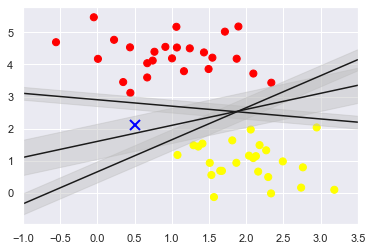

In [16]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65, 0.33), (0.5, 1.6,0.55), (-0.2, 2.9, 0.2)]: #introducimos d la distancia de la recta negra a la forntera
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor='none', color="#BBBBBB", alpha = 0.4)
    
plt.xlim(-1,3.5)

## Creación del modelo SVM

In [8]:
from sklearn.svm import SVC

In [9]:
model=SVC(kernel="linear", C = 1E10)
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
def plt_svc(model, ax=None, plot_support=True): #plot_support para que nos establezca nos solo la recta, sino también el corredor(zona gris)
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None: #sino existe nungun dibujo, lo creamos
        ax = plt.gca()
    xlim = ax.get_xlim() #ponemos los limites como limites de representacion del dibujo usando get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx) 
    #numpy.meshgrid: acepta como entrada las coordenadas que definen el segmento del hiperplano 
    #(puede tratarse de dos dimensiones o de cualquier otro número de ellas) y devuelve arrays con 
    #las coordenadas de dichos puntos
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T #ravel() aplana la matriz y T la traspone(la pone en columna)
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], #las x
                   model.support_vectors_[:,1], #las y
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim) #usando set_xlim()
    ax.set_ylim(ylim)
    

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


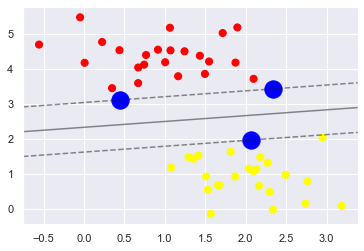

In [18]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)

In [12]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    


[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


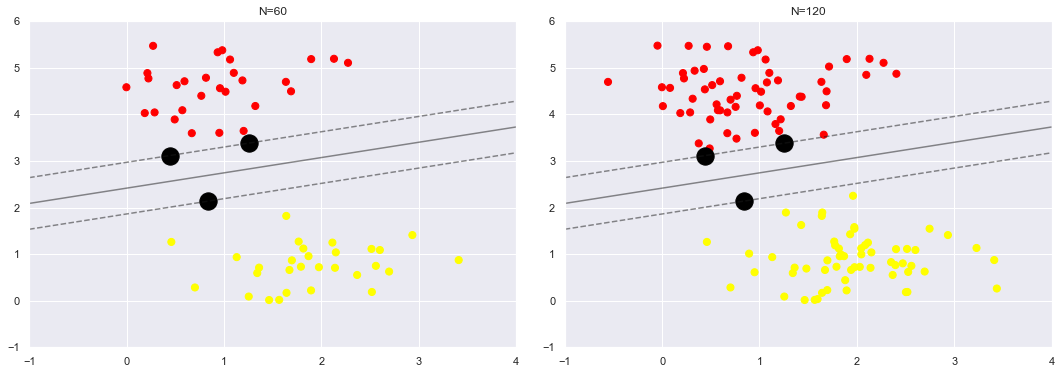

In [13]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1) #añadimos margenes a la gráfica
for ax_i, N, in zip(ax, [60, 120]): #usamos 60 elemento del primer modelo y 120 del segundo
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [14]:
from ipywidgets import interact, fixed

In [15]:
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>